<a href="https://colab.research.google.com/github/roquearmas/pruebasIA/blob/main/SVM_RAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAREA SVM Máquinas de Vector de Soporte.**

***Jesús Roque Armas Martín***

Importo las librerías necesarias y cargo el dataset de Iris

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=1, stratify=y)

class_names = ['Setosa','Versicolor','Virginica']

print('Class labels: ', np.unique(y))
print('Class names : ' ,class_names)

Class labels:  [0 1 2]
Class names :  ['Setosa', 'Versicolor', 'Virginica']


Método para pintar las gráficas


In [6]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],     y=X[y == cl, 1],     alpha=0.8,     c=colors[idx],     marker=markers[idx],     label=f'Class {cl}',     edgecolor='black')
    # highlight test examples
    if test_idx:
      # plot all examples
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0],
      X_test[:, 1],
      c='none',
      edgecolor='black',
      alpha=1.0,
      linewidth=1,
      marker='o',
      s=100,
      label='Test set')


Escalamos y transformamos los datos, para que sean interpretables

In [3]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Entreno el modelo SVC, con el kernel tipo "*linear*" de acuerdo a los parámetros Longitud y Anchura del pétalo

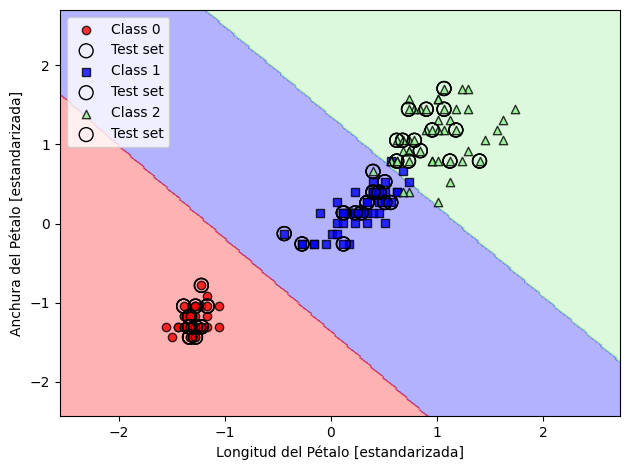

In [7]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Represento la gráfica con los datos estandarizados
plot_decision_regions(X_combined_std,  y_combined, classifier=svm,  test_idx=range(105, 150))
plt.xlabel('Longitud del Pétalo [estandarizada]')
plt.ylabel('Anchura del Pétalo [estandarizada]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

Repito la operación con el kernel del modelo tipo "*rbf*"

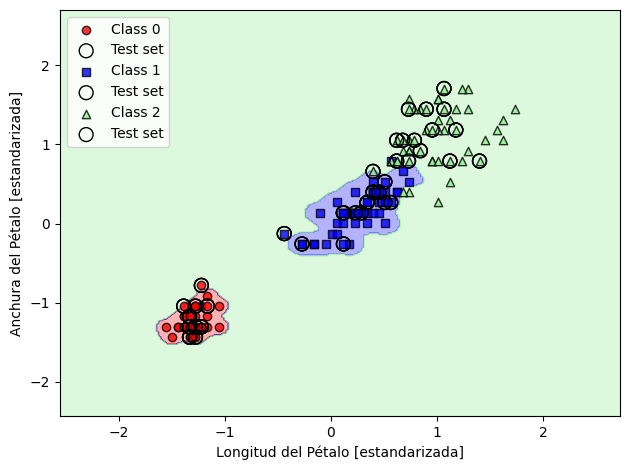

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
classifier=svm, test_idx=range(105, 150))
plt.xlabel('Longitud del Pétalo [estandarizada]')
plt.ylabel('Anchura del Pétalo [estandarizada]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_16.png', dpi=300)
plt.show()

Pido los parámetros (Longitud y anchura del pétalo) y muestro la predicción del modelo



In [8]:
L =float(input ('Longitud del pétalo '))
A = float(input('Ancho del pétalo '))
nuevo_elemento = np.array([L, A])

X_test = np.append(X_test, [nuevo_elemento], axis=0)

predictions=svm.predict(X_test)
predictions[len(X_test)-1]
print(class_names[predictions[len(X_test)-1]])

Longitud del pétalo 3.22
Ancho del pétalo 2.23
Virginica


In [ ]:
from IPython.display import HTML, display, Javascript

# Función para recibir los parámetros y ejecutar el código
def procesar_parametros(parametro1, parametro2):
    # Aquí puedes colocar el código que utilizará los parámetros
    L,A =  parametro1 , parametro2
    print(L,A)
    nuevo_elemento = np.array([L, A])
    X_test = np.append(X_test, [nuevo_elemento], axis=0)
    predictions=svm.predict(X_test)
    predictions[len(X_test)-1]
    print(class_names[predictions[len(X_test)-1]])

In [ ]:
formulario_html = """
<label for="parametro1">Longitud del pétalo :</label>
<input type="number" step="0.01" id="parametro1" name="parametro1" required><br>

<label for="parametro2">Anchura del pétalo :</label>
<input type="number" step="0.01" id="parametro2" name="parametro2" required><br>

<button onclick="procesarFormulario()">Enviar</button>

<script>
function procesarFormulario() {
  var parametro1 = parseFloat(document.getElementById('parametro1').value);
  var parametro2 = parseFloat(document.getElementById('parametro2').value);

  // Llamar a la función de Python con los parámetros
  google.colab.kernel.invokeFunction('procesar_parametros', [parametro1, parametro2], {});
}
</script>
"""

# Mostrar el formulario HTML en el cuaderno
display(HTML(formulario_html))

# Registrar la función de Python para ser invocada desde el formulario
display(Javascript('''function procesarFormulario(parametro1, parametro2) {
    // Llamar a la función de Python con los parámetros
    google.colab.kernel.invokeFunction('procesar_parametros', [parametro1, parametro2], {});
}
'''))
print('Después')

<IPython.core.display.Javascript object>

Después


# Nueva sección